# Import Library

In [1]:
import numpy as np
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

# Import and Inspect Data Set 

In [11]:
df = pd.read_csv('bank.csv', sep= ";")

In [12]:
#Inspect First 5 row of the data set 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [13]:
#Data Set Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [14]:
#Missing Values in The Data Set 
df.isnull().sum()/len(df)*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [15]:
#Statictical Summary of The Data Set 
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# Data Preprocessing 

In [17]:
#Preprocessing Categorical Variable 
categorical = df.select_dtypes('object').columns.tolist()
numerical = df.select_dtypes('number').columns.tolist()

In [18]:
#Describe for Categorical Data 
df[categorical].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [21]:
#Preprocessing Yes or No Data 
enc_y_n = {'yes' : 1, 
           'no':0}
for i in ['default', 'housing', 'loan', 'y']: 
    df[i] = df[i].map(enc_y_n)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


## Preprocessing Education and Poutcome since there are some hierarchy for this feature

In [22]:
print(df['education'].value_counts())
print("")
print(df['poutcome'].value_counts())

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64


In [23]:
#Preprocessing for Education 
enc_ed = {'tertiary':2, 
          'secondary':1, 
          'primary':0, 
          'unknown': 0}
df['education'] = df['education'].map(enc_ed)

In [24]:
#Preprocessing for poutcome 
enc_poutcome = {'success' : 2, 
                'unknown' : 1, 
                 'other' : 1, 
                'failure' : 0}

df['poutcome'] = df['poutcome'].map(enc_poutcome)

## Preprocess Month to Numerical

In [25]:
df['month'].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [26]:
#Encoding for Month 
enc_month = {'jan' : 1, 
             'feb' : 2, 
             'mar' : 3, 
             'apr' : 4, 
             'may' : 5, 
             'jun' : 6, 
             'jul' : 7, 
             'aug' : 8, 
             'sep' : 9, 
             'oct' : 10, 
             'nov' : 11, 
             'dec' : 12}
df['month'] = df['month'].map(enc_month)

## Preprocessing for the rest categorical feature

In [27]:
#Data Set 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,0,0,1787,0,0,cellular,19,10,79,1,-1,0,1,0
1,33,services,married,1,0,4789,1,1,cellular,11,5,220,1,339,4,0,0
2,35,management,single,2,0,1350,1,0,cellular,16,4,185,1,330,1,0,0
3,30,management,married,2,0,1476,1,1,unknown,3,6,199,4,-1,0,1,0
4,59,blue-collar,married,1,0,0,1,0,unknown,5,5,226,1,-1,0,1,0


In [28]:
#One Hot Encoding for Job 
job_enc = pd.get_dummies(df['job'], prefix='job')
job_enc

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0,0,0,0,0,0,0,1,0,0,0,0
4517,0,0,0,0,0,0,1,0,0,0,0,0
4518,0,0,0,0,0,0,0,0,0,1,0,0
4519,0,1,0,0,0,0,0,0,0,0,0,0


In [29]:
marital_enc = pd.get_dummies(df['marital'], prefix='marital')
marital_enc

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
4516,0,1,0
4517,0,1,0
4518,0,1,0
4519,0,1,0


In [30]:
contact_enc = pd.get_dummies(df['contact'], prefix='contact')
contact_enc

,contact_cellular,contact_telephone,contact_unknown
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
4516,1,0,0
4517,0,0,1
4518,1,0,0
4519,1,0,0


In [31]:
# Merge Data Set 
df_for_model = pd.concat([df,job_enc, marital_enc, contact_enc], axis=1)
df_for_model.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,30,unemployed,married,0,0,1787,0,0,cellular,19,10,79,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
1,33,services,married,1,0,4789,1,1,cellular,11,5,220,1,339,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,35,management,single,2,0,1350,1,0,cellular,16,4,185,1,330,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
3,30,management,married,2,0,1476,1,1,unknown,3,6,199,4,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,59,blue-collar,married,1,0,0,1,0,unknown,5,5,226,1,-1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [33]:
#Drop job,marital, and contact since we have encoded the data 
df_for_model.drop(['job', 'marital', 'contact'], axis=1, inplace=True)

In [34]:
df_for_model.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,30,0,0,1787,0,0,19,10,79,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
1,33,1,0,4789,1,1,11,5,220,1,339,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,35,2,0,1350,1,0,16,4,185,1,330,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
3,30,2,0,1476,1,1,3,6,199,4,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,59,1,0,0,1,0,5,5,226,1,-1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


# Split Train Test Data 

In [35]:
#Target and Feature selection 
X = df_for_model.drop('y', axis=1)
Y = df_for_model['y']

In [63]:
#Split Train Test Data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=df_for_model['y'], random_state=42)

# Scaling for Numerical Data 

In [64]:
#Reset Index 
X_train.reset_index(inplace=True)
X_test.reset_index(inplace=True)

In [65]:
#Split Numerical and Categorical on Feature 
X_train_num = X_train[numerical]
X_train_cat = X_train.drop(numerical, axis=1)
X_test_num = X_test[numerical]
X_test_cat = X_test.drop(numerical, axis=1)

In [66]:
#Scalling Numerical Data 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
#fit to train data
ss.fit(X_train_num)
X_train_num_scld = pd.DataFrame(ss.transform(X_train_num),columns = X_train_num.columns)
X_test_num_scld = pd.DataFrame(ss.transform(X_test_num),columns = X_test_num.columns)

In [67]:
#Merge Back Data Set 
X_train_scld = pd.concat([X_train_num_scld, X_train_cat], axis=1)
X_test_scld = pd.concat([X_test_num_scld, X_test_cat], axis=1)

In [68]:
X_train_scld

,age,balance,day,duration,campaign,pdays,previous,index,education,default,housing,loan,month,poutcome,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,-0.864347,-0.505865,-0.492444,-0.417317,0.065082,-0.411541,-0.329453,2236,1,1,1,0,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,-0.673204,-0.448232,-0.248716,-0.612989,-0.570967,0.447116,11.136987,858,2,0,1,1,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,0.282513,-0.499461,0.726196,-0.804824,-0.252942,-0.411541,-0.329453,3531,2,0,0,0,8,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,-0.673204,2.456534,0.360604,-0.820171,-0.570967,-0.411541,-0.329453,2737,1,0,1,1,11,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0.951514,1.297118,-0.004988,-0.724253,1.337181,-0.411541,-0.329453,1257,0,0,0,1,6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,1.333801,-0.267151,-1.223628,2.057362,-0.570967,-0.411541,-0.329453,4327,0,0,0,0,6,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3612,-0.195346,-0.499461,-1.711084,1.792629,-0.570967,1.525430,1.481037,1205,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3613,-0.577632,-0.499461,-0.248716,-0.532418,-0.252942,-0.411541,-0.329453,4095,1,0,0,0,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3614,-0.386489,-0.462107,0.116876,-0.014462,0.383107,-0.411541,-0.329453,4335,1,0,0,1,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [69]:
X_test_scld

,age,balance,day,duration,campaign,pdays,previous,index,education,default,housing,loan,month,poutcome,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,1.716087,0.114933,1.091788,0.906349,0.383107,3.172855,0.877541,2032,0,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,-0.099774,-0.460684,0.482468,0.530351,6.107549,-0.411541,-0.329453,943,1,0,0,0,6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,0.282513,-0.343639,-0.979900,-0.870048,0.065082,2.623713,0.274044,408,1,0,1,0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,-1.151062,-0.535749,-1.467356,-0.497887,-0.570967,-0.411541,-0.329453,3034,0,0,0,0,7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,1.142658,-0.447521,1.701108,-0.436500,-0.570967,-0.411541,-0.329453,3447,2,0,0,0,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,-1.533349,-0.496615,0.726196,-0.601479,-0.252942,-0.411541,-0.329453,4117,1,0,0,0,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
901,-0.290917,-0.070773,0.482468,-0.839355,0.383107,1.126055,0.274044,4514,1,0,1,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
902,-0.673204,-0.278180,0.604332,-0.455684,-0.570967,-0.411541,-0.329453,1858,1,0,1,0,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
903,-0.482061,-0.439694,-0.492444,-0.812498,-0.570967,-0.411541,-0.329453,3174,1,0,1,0,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [70]:
#Sanitiy Check for Data Set Values 
X_train_scld.isnull().sum()

age                  0
balance              0
day                  0
duration             0
campaign             0
pdays                0
previous             0
index                0
education            0
default              0
housing              0
loan                 0
month                0
poutcome             0
job_admin.           0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_unknown          0
marital_divorced     0
marital_married      0
marital_single       0
contact_cellular     0
contact_telephone    0
contact_unknown      0
dtype: int64

In [71]:
X_test_scld.isnull().sum()

age                  0
balance              0
day                  0
duration             0
campaign             0
pdays                0
previous             0
index                0
education            0
default              0
housing              0
loan                 0
month                0
poutcome             0
job_admin.           0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_unknown          0
marital_divorced     0
marital_married      0
marital_single       0
contact_cellular     0
contact_telephone    0
contact_unknown      0
dtype: int64

In [72]:
#Drop Index Values for Both Training Data and Testing Data 
X_train_scld.drop('index', axis=1, inplace=True)
X_test_scld.drop('index', axis=1, inplace=True)

In [73]:
X_train_scld

,age,balance,day,duration,campaign,pdays,previous,education,default,housing,loan,month,poutcome,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,-0.864347,-0.505865,-0.492444,-0.417317,0.065082,-0.411541,-0.329453,1,1,1,0,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,-0.673204,-0.448232,-0.248716,-0.612989,-0.570967,0.447116,11.136987,2,0,1,1,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,0.282513,-0.499461,0.726196,-0.804824,-0.252942,-0.411541,-0.329453,2,0,0,0,8,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,-0.673204,2.456534,0.360604,-0.820171,-0.570967,-0.411541,-0.329453,1,0,1,1,11,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0.951514,1.297118,-0.004988,-0.724253,1.337181,-0.411541,-0.329453,0,0,0,1,6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,1.333801,-0.267151,-1.223628,2.057362,-0.570967,-0.411541,-0.329453,0,0,0,0,6,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3612,-0.195346,-0.499461,-1.711084,1.792629,-0.570967,1.525430,1.481037,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3613,-0.577632,-0.499461,-0.248716,-0.532418,-0.252942,-0.411541,-0.329453,1,0,0,0,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3614,-0.386489,-0.462107,0.116876,-0.014462,0.383107,-0.411541,-0.329453,1,0,0,1,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [74]:
X_test_scld

,age,balance,day,duration,campaign,pdays,previous,education,default,housing,loan,month,poutcome,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,1.716087,0.114933,1.091788,0.906349,0.383107,3.172855,0.877541,0,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,-0.099774,-0.460684,0.482468,0.530351,6.107549,-0.411541,-0.329453,1,0,0,0,6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,0.282513,-0.343639,-0.979900,-0.870048,0.065082,2.623713,0.274044,1,0,1,0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,-1.151062,-0.535749,-1.467356,-0.497887,-0.570967,-0.411541,-0.329453,0,0,0,0,7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,1.142658,-0.447521,1.701108,-0.436500,-0.570967,-0.411541,-0.329453,2,0,0,0,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,-1.533349,-0.496615,0.726196,-0.601479,-0.252942,-0.411541,-0.329453,1,0,0,0,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
901,-0.290917,-0.070773,0.482468,-0.839355,0.383107,1.126055,0.274044,1,0,1,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
902,-0.673204,-0.278180,0.604332,-0.455684,-0.570967,-0.411541,-0.329453,1,0,1,0,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
903,-0.482061,-0.439694,-0.492444,-0.812498,-0.570967,-0.411541,-0.329453,1,0,1,0,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


# Model Training

For Chosing the Best Model, AUC Score evaluation is used

In [76]:
#Train and Compare Model 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

model_alg = [LogisticRegression(), KNeighborsClassifier(), SVC(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier()]
df_mod_eval = pd.DataFrame(columns = ['Algorithm','AUC Score'])
for model in model_alg : 
    model.fit(X_train_scld, y_train)
    algorithm = str(type(model)).split('.')[-1][:-2]
    y_pred = model.predict(X_test_scld)
    auc = roc_auc_score(y_test, y_pred)
    df_mod_eval = df_mod_eval.append({'Algorithm' : algorithm, 
                                    'AUC Score' : auc},ignore_index=True)
df_mod_eval

C:\Users\andon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\andon\AppData\Local\Temp\ipykernel_2420\392594709.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mod_eval = df_mod_eval.append({'Algorithm' : algorithm,
C:\Users\andon\AppData\Local\Temp\ipykernel_2420\392594709.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mod_eval = df_mod_eval

,Algorithm,AUC Score
0,LogisticRegression,0.607708
1,KNeighborsClassifier,0.617323
2,SVC,0.53534
3,GaussianNB,0.680526
4,DecisionTreeClassifier,0.651799
5,RandomForestClassifier,0.617948


Conclusion: GaussianNB is the best model since it has the highest AUC Score

# Model Evaluation

Text(0.5, 1.0, 'Confusion Matrix')

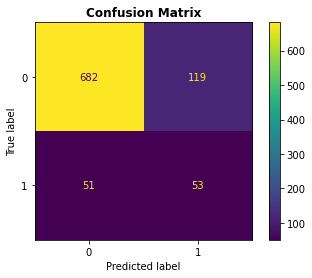

In [77]:
#Confusion Matrix for Naive Bayes Classifier 
#Evaluation of Baseline Model 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model_alg[3].predict(X_test_scld))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.title('Confusion Matrix', fontweight = 'bold')

In [80]:
#Classification Report for Naive Bayes 
from sklearn.metrics import classification_report 
print(classification_report(y_test,model_alg[3].predict(X_test_scld)))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       801
           1       0.31      0.51      0.38       104

    accuracy                           0.81       905
   macro avg       0.62      0.68      0.64       905
weighted avg       0.86      0.81      0.83       905

